#  Load the Data and Required Packages

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

In [2]:
# Set display options
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.options.display.float_format = "{:.2f}".format

In [3]:
# Import the CSV Data as Pandas DataFrame (We will only load train_df)
df = pd.read_csv("train.csv")

In [4]:
# Display the first few rows to get a basic idea
df.head()

customer_id  rate  amount      purpose  period  cus_age  gender  \
0         3683 20.51 4835.78     Personal      11       35  Female   
1        11464 19.47 5043.25     Personal       8       43    Male   
2         2170 19.83 4110.49  Maintenance      17       39  Female   
3        10330 19.11 3977.85     Personal      31       33  Female   
4        14564 20.00 3864.36  Maintenance      12       26    Male   

  education_level marital_status has_children living_situation  \
0        Educated         Single          Yes        Dependent   
1        Educated         Single          Yes      Independent   
2   Unknown/Other         Single           No        Dependent   
3   Unknown/Other         Single           No        Dependent   
4   Unknown/Other        Married          Yes        Dependent   

   total_experience  income job_sector   DTI   APR  ccr_tot_mounth_amt  \
0               137 1063.26     Public 31.80 19.61               63.30   
1               184  165.72     Public 41.77 30.61               46.91   
2                 0   87.19    Private 35.62 19.83                9.63   
3                65  727.13    Private 31.29 21.57                0.00   
4               107 1507.51    Private 27.80 21.23               16.98   

   ccr_payed_loan_tot_amt  ccr_act_loan_tot_rest_amt  loan_status  
0                    0.00                     168.93            0  
1                12824.12                    1168.76            1  
2                 5874.63                     345.92            1  
3                 6897.89                       0.00            0  
4                 2100.46                       0.00            0

# Data Overview

In [5]:
# Basic structure
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)

Data shape: (13852, 20)

Data types:
 customer_id                    int64
rate                         float64
amount                       float64
purpose                       object
period                         int64
cus_age                        int64
gender                        object
education_level               object
marital_status                object
has_children                  object
living_situation              object
total_experience               int64
income                       float64
job_sector                    object
DTI                          float64
APR                          float64
ccr_tot_mounth_amt           float64
ccr_payed_loan_tot_amt       float64
ccr_act_loan_tot_rest_amt    float64
loan_status                    int64
dtype: object


* customer_id: A unique identifier for each customer.
* rate: The interest rate of the loan, typically expressed as a percentage.
* amount: The total amount of loan borrowed.
* purpose: The reason or purpose for which the loan was taken.
* period: The duration over which the loan is to be repaid.
* cus_age: The age of the customer.
* gender: The gender of the customer.
* education_level: The highest level of education attained by the customer.
* marital_status: The marital status of the customer (e.g., single, married).
* has_children: Indicates whether the customer has children or not.
* living_situation: Describes the living situation of the customer.
* total_experience: The total work experience of the customer in months.
* income: Customer's monthly income.
* job_sector: The sector of employment for the customer (e.g., public, private).
* DTI (Debt-to-Income Ratio): A ratio that compares a customer's total debt to their annual income.
* APR (Annual Percentage Rate): The annual rate charged for borrowing, which includes fees and additional costs.
* ccr_tot_mounth_amt (Centralized Credit Registry Total Monthly Amount): The total monthly amount due on credit reported to the centralized credit registry.
* ccr_payed_loan_tot_amt (Centralized Credit Registry Paid Loan Total Amount): The total amount paid towards loans as reported to the centralized credit registry.
* ccr_act_loan_tot_rest_amt (Centralized Credit Registry Active Loan Total Rest Amount): The remaining amount in active loans as reported to the centralized credit registry.
* loan_status: The current status of the loan (1 - loan application was rejected, 0 - loan application was approved).

In [6]:
# General Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13852 entries, 0 to 13851
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                13852 non-null  int64  
 1   rate                       13852 non-null  float64
 2   amount                     12460 non-null  float64
 3   purpose                    13852 non-null  object 
 4   period                     13852 non-null  int64  
 5   cus_age                    13852 non-null  int64  
 6   gender                     13852 non-null  object 
 7   education_level            13852 non-null  object 
 8   marital_status             12523 non-null  object 
 9   has_children               13852 non-null  object 
 10  living_situation           13852 non-null  object 
 11  total_experience           13852 non-null  int64  
 12  income                     13852 non-null  float64
 13  job_sector                 12466 non-null  obj

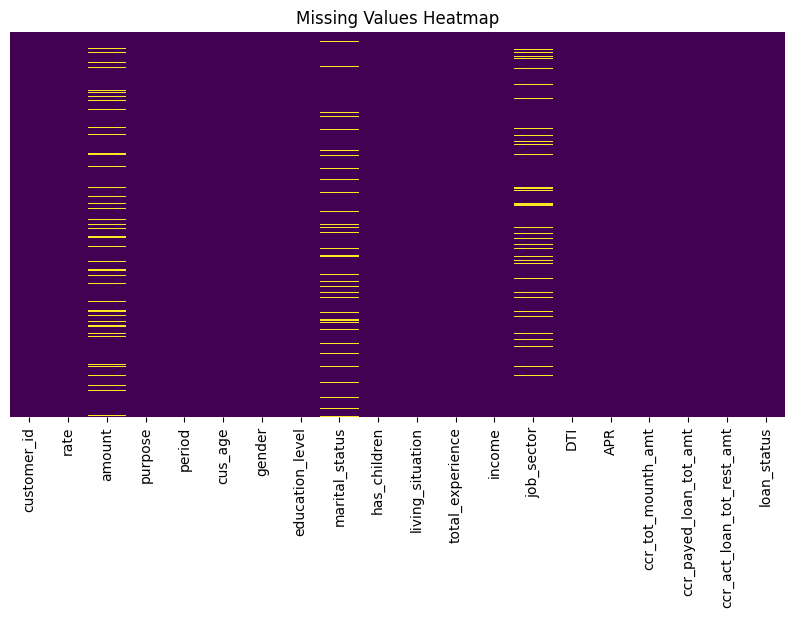

In [7]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [39]:
# Table of missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_application_train_data.head(3)

Total  Percent
rate                           0     0.00
total_experience               0     0.00
ccr_act_loan_tot_rest_amt      0     0.00

In [9]:
# Let's check duplicated values
df.duplicated().sum()

0

In [10]:
# Let's drop unnecessary column 
df.drop(columns="customer_id", inplace = True)

In [11]:
# Check statistical summary of the dataset
df.describe().T

count    mean     std    min     25%     50%  \
rate                      13852.00   20.16    3.09  10.76   18.07   19.69   
amount                    12460.00 2843.76 1463.66 300.00 1765.40 2812.54   
period                    13852.00   23.67    8.85   3.00   18.00   24.00   
cus_age                   13852.00   38.93   11.63  18.00   31.00   39.00   
total_experience          13852.00  115.77   86.35   0.00   43.00  110.00   
income                    13852.00  588.88  277.47  73.00  390.35  586.26   
DTI                       13852.00   31.01    6.91  13.21   26.17   29.96   
APR                       13852.00   22.22    2.94  13.85   20.23   21.72   
ccr_tot_mounth_amt        13852.00   48.20   46.95   0.00    7.07   39.51   
ccr_payed_loan_tot_amt    13852.00 4806.91 4341.91   0.00  619.76 4140.35   
ccr_act_loan_tot_rest_amt 13852.00  777.96  769.68   0.00    0.00  620.13   
loan_status               13852.00    0.30    0.46   0.00    0.00    0.00   

                              75%      max  
rate                        21.70    36.00  
amount                    3847.48  7600.00  
period                      30.00    57.00  
cus_age                     46.00    76.00  
total_experience           176.00   460.00  
income                     779.30  1520.00  
DTI                         34.89    55.78  
APR                         23.67    38.80  
ccr_tot_mounth_amt          73.11   267.36  
ccr_payed_loan_tot_amt    7743.74 22743.84  
ccr_act_loan_tot_rest_amt 1269.73  5148.39  
loan_status                  1.00     1.00

In [12]:
# Checking the number of unique values of each column
df.nunique()

rate                         13852
amount                       11837
purpose                          2
period                          54
cus_age                         59
gender                           2
education_level                  2
marital_status                   2
has_children                     2
living_situation                 2
total_experience               404
income                       13311
job_sector                       2
DTI                          13843
APR                          13852
ccr_tot_mounth_amt           11008
ccr_payed_loan_tot_amt       10855
ccr_act_loan_tot_rest_amt    10281
loan_status                      2
dtype: int64

In [13]:
# Check values in categorical columns
columns_of_interest = [
    "purpose",
    "gender",
    "education_level",
    "marital_status",
    "has_children",
    "living_situation",
    "job_sector",
    "loan_status"
]

for column in columns_of_interest:
    print(f"Categories in '{column}' variable:", df[column].unique())

Categories in 'purpose' variable: ['Personal' 'Maintenance']
Categories in 'gender' variable: ['Female' 'Male']
Categories in 'education_level' variable: ['Educated' 'Unknown/Other']
Categories in 'marital_status' variable: ['Single' 'Married' nan]
Categories in 'has_children' variable: ['Yes' 'No']
Categories in 'living_situation' variable: ['Dependent' 'Independent']
Categories in 'job_sector' variable: ['Public' 'Private' nan]
Categories in 'loan_status' variable: [0 1]


In [14]:
# Define numerical & categorical columns using pandas select_dtypes
numeric_features = df.select_dtypes(exclude="object").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

# Print columns using f-strings for clearer formatting
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 12 numerical features: ['rate', 'amount', 'period', 'cus_age', 'total_experience', 'income', 'DTI', 'APR', 'ccr_tot_mounth_amt', 'ccr_payed_loan_tot_amt', 'ccr_act_loan_tot_rest_amt', 'loan_status']

We have 7 categorical features: ['purpose', 'gender', 'education_level', 'marital_status', 'has_children', 'living_situation', 'job_sector']


# Preprocessing

### Fill Missing Values

In [15]:
from sklearn.impute import SimpleImputer
# Impute numerical columns with the mean
numerical_imputer = SimpleImputer(strategy="mean")
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

In [16]:
# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [17]:
# Verify imputation
print("Missing values after imputation:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values after imputation:
rate                         0
total_experience             0
ccr_act_loan_tot_rest_amt    0
ccr_payed_loan_tot_amt       0
ccr_tot_mounth_amt           0
APR                          0
DTI                          0
job_sector                   0
income                       0
living_situation             0
amount                       0
has_children                 0
marital_status               0
education_level              0
gender                       0
cus_age                      0
period                       0
purpose                      0
loan_status                  0
dtype: int64


In [18]:
# Apply Label Encoding to Categorical Columns
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# EDA

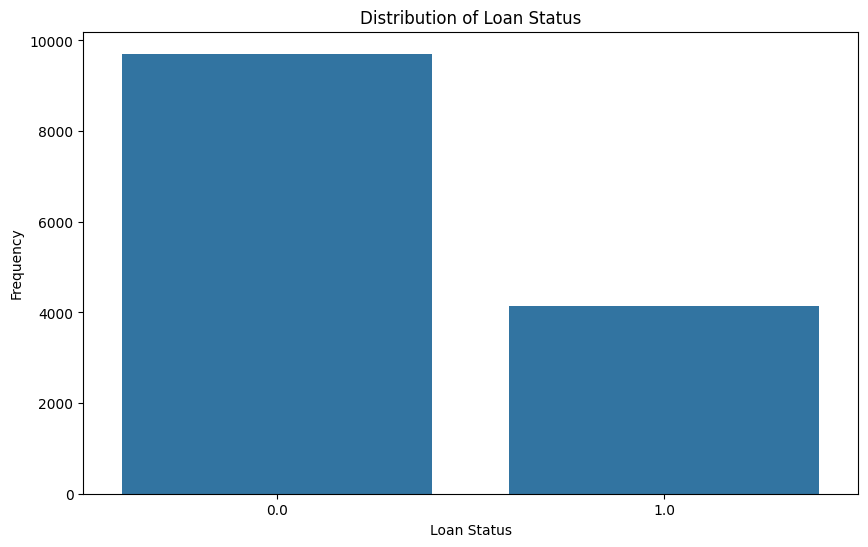

In [20]:
# Visualize the distribution of the target column 'loan_status'
plt.figure(figsize=(10, 6))
sns.countplot(x="loan_status", data=df)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

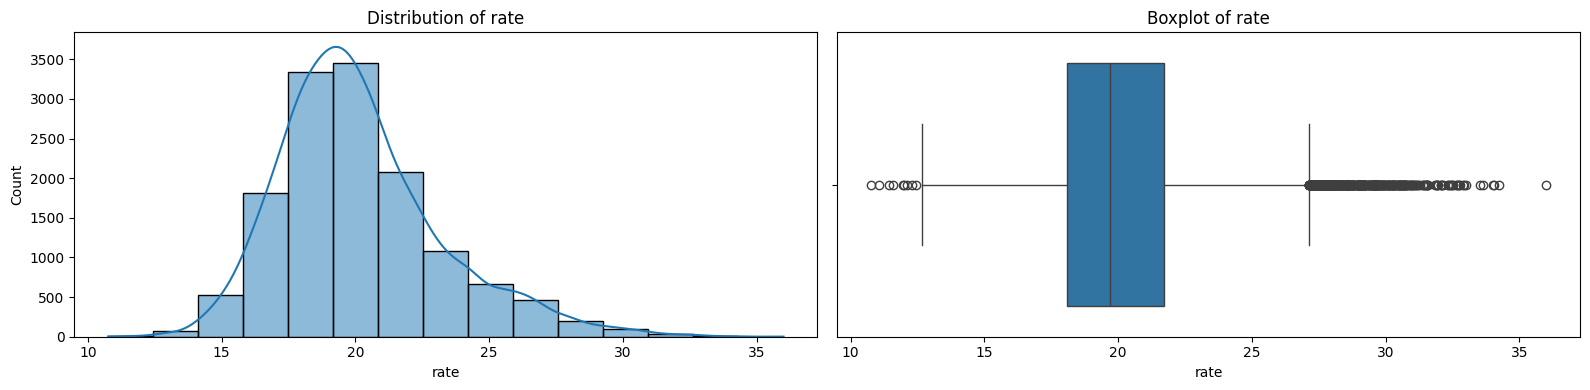

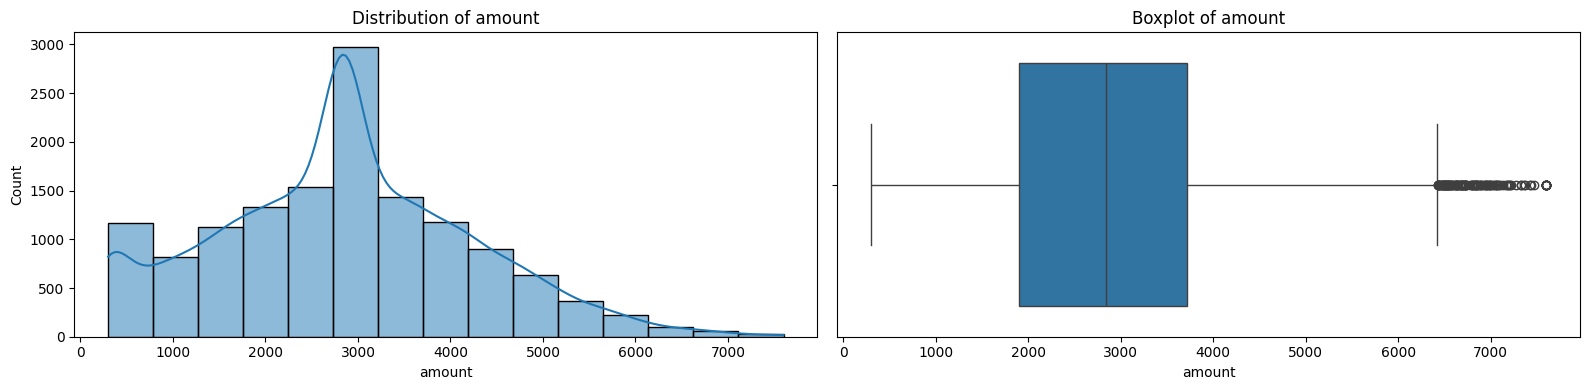

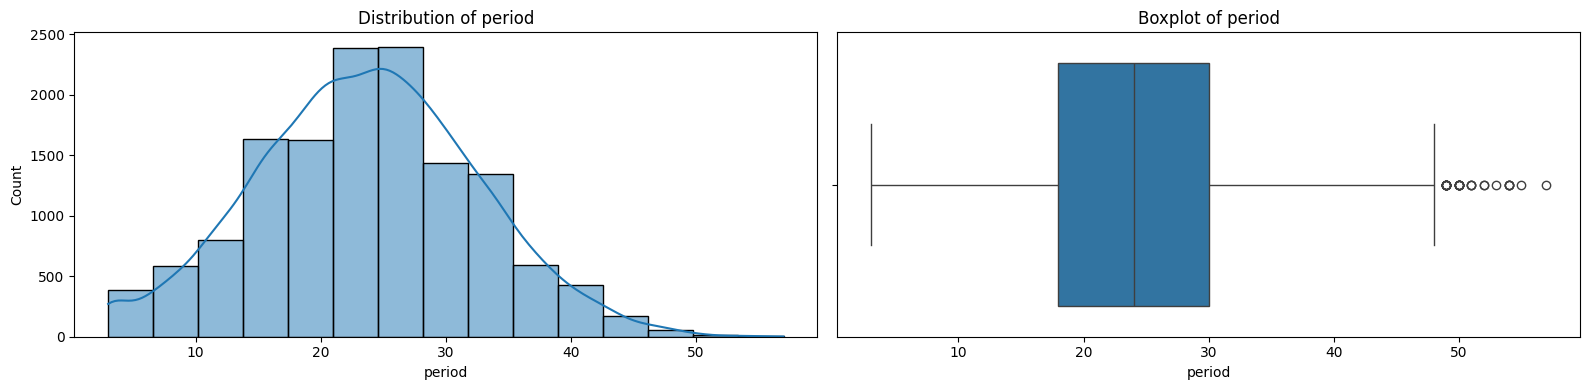

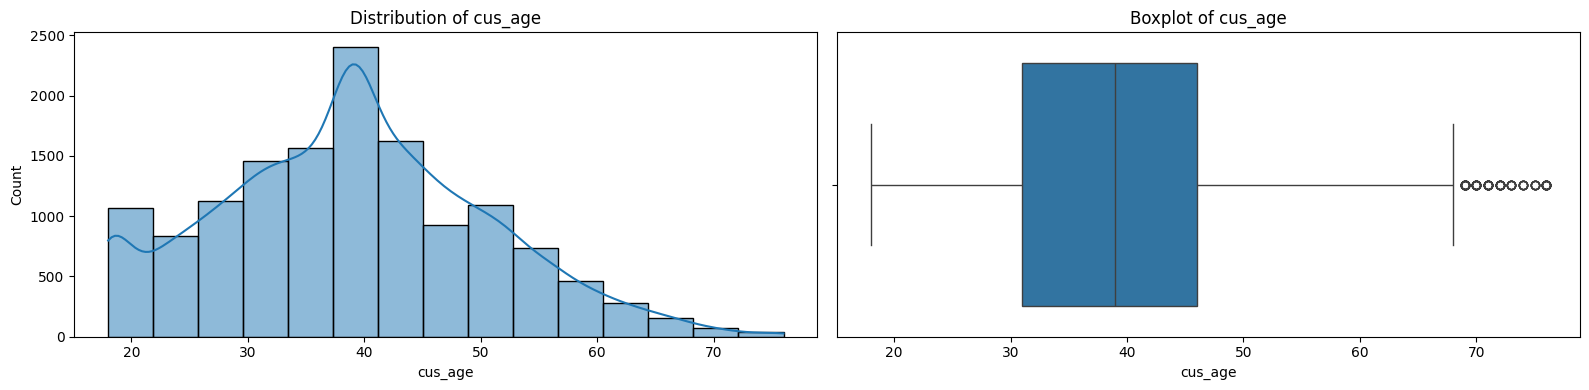

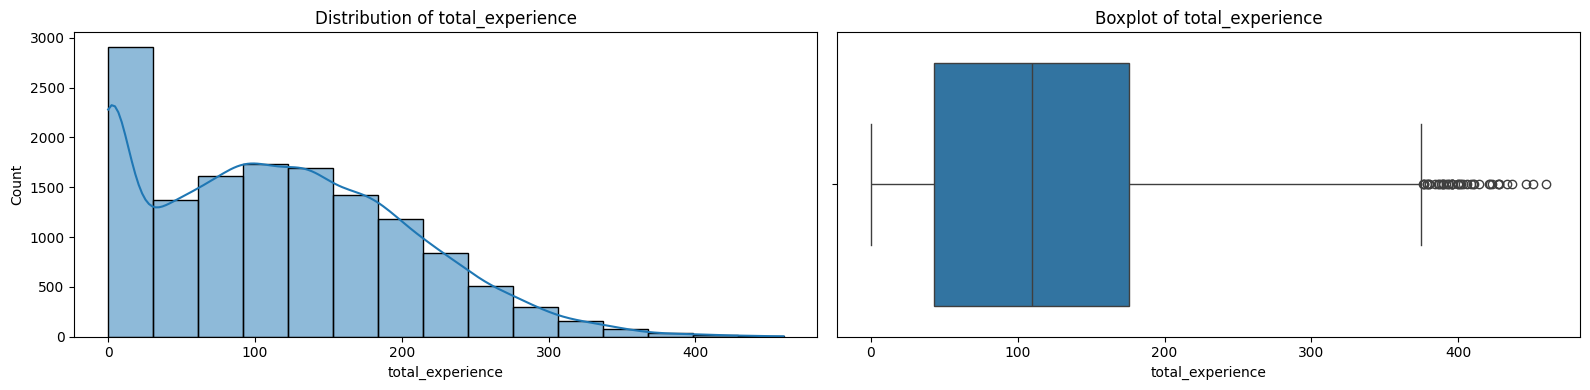

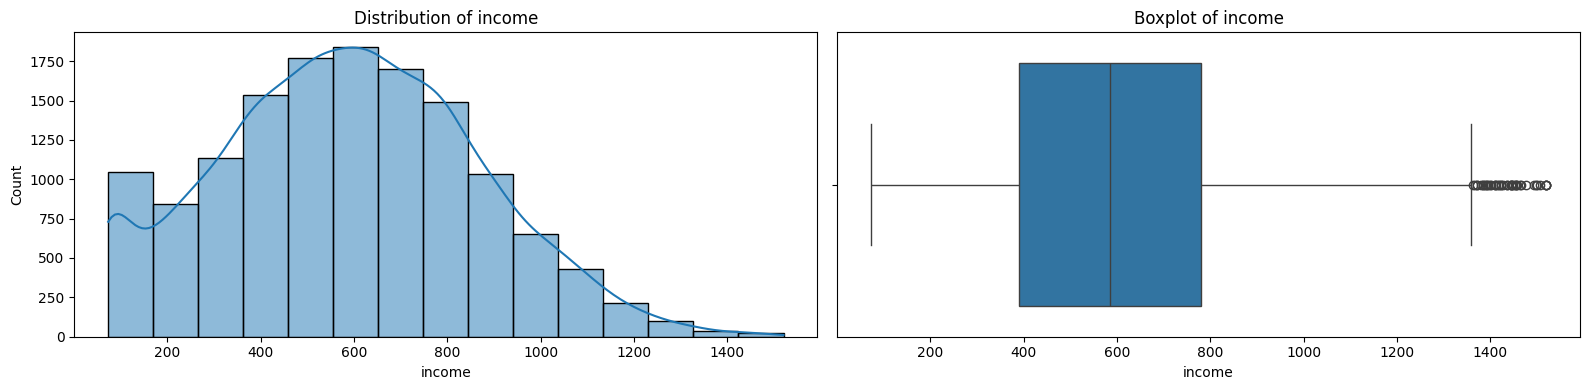

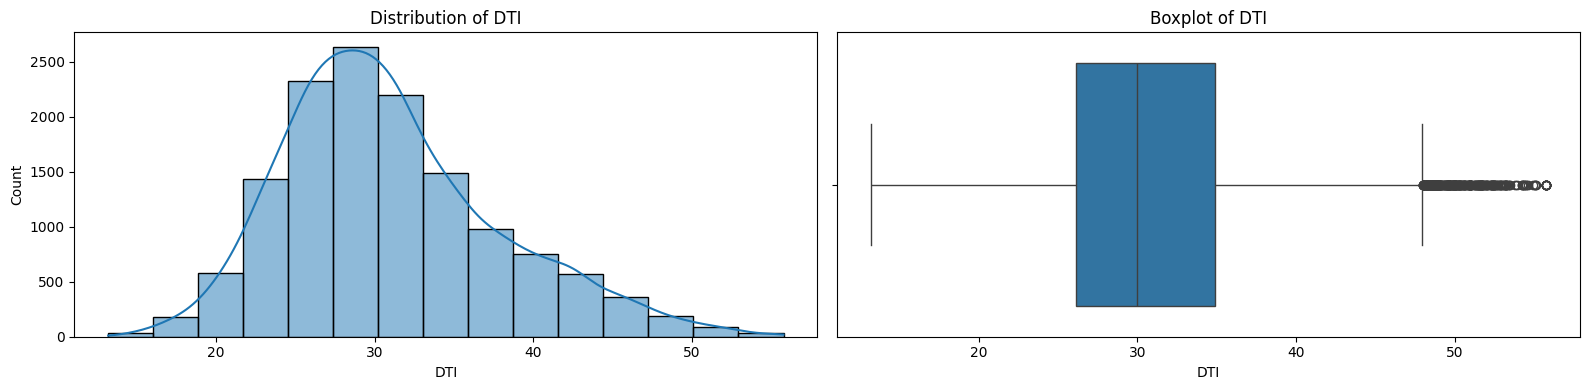

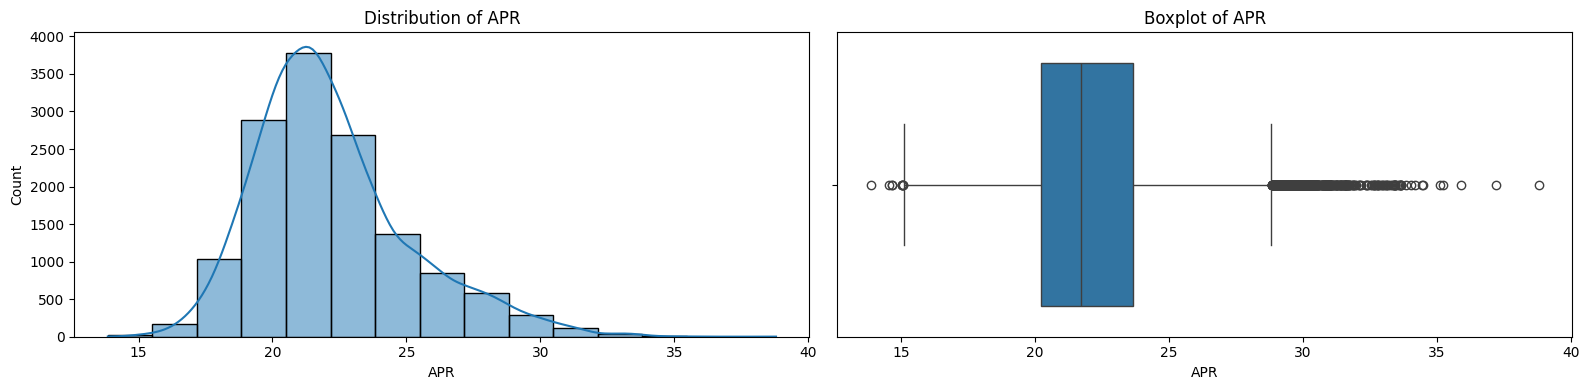

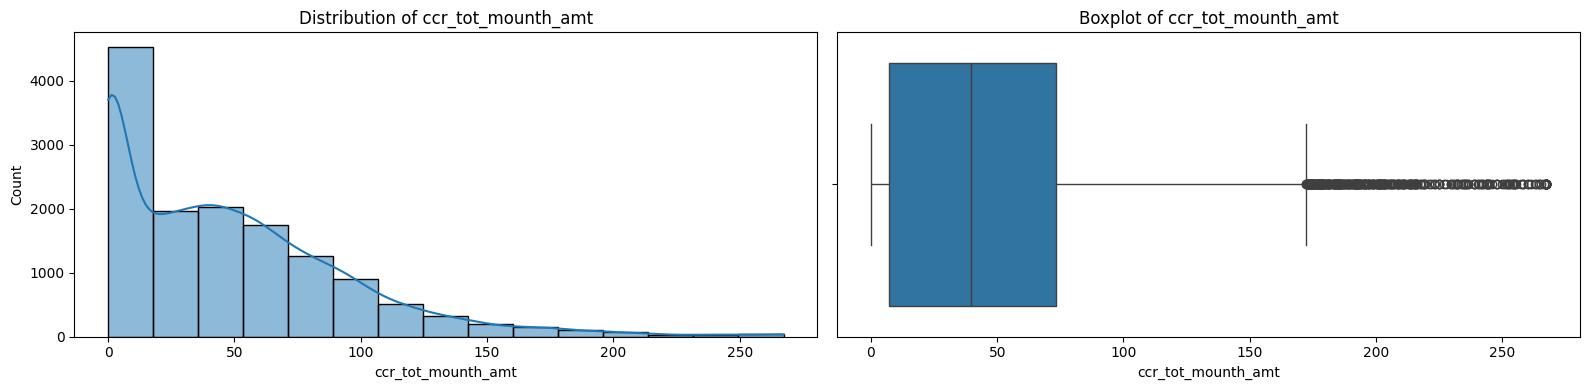

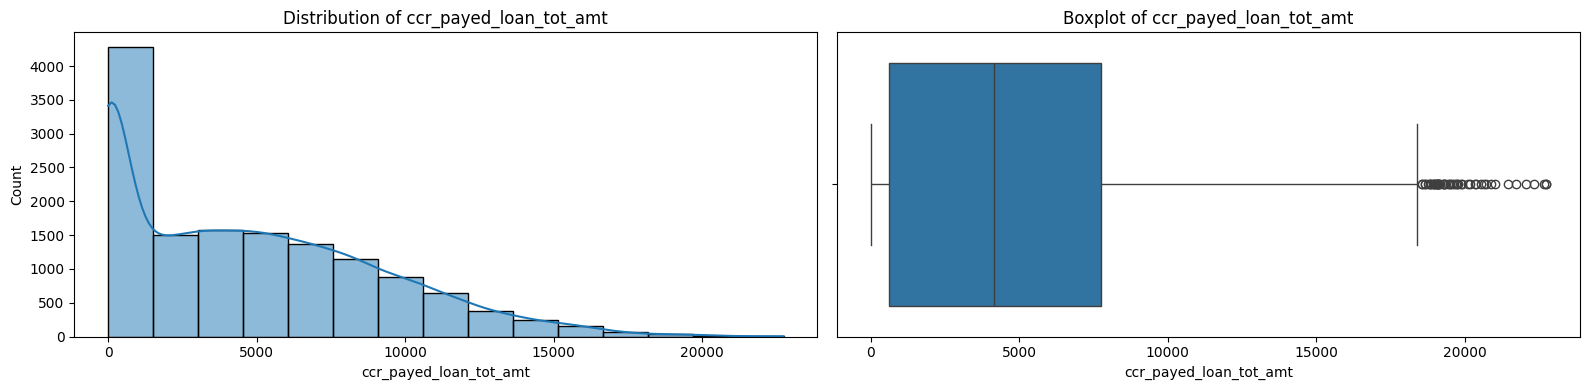

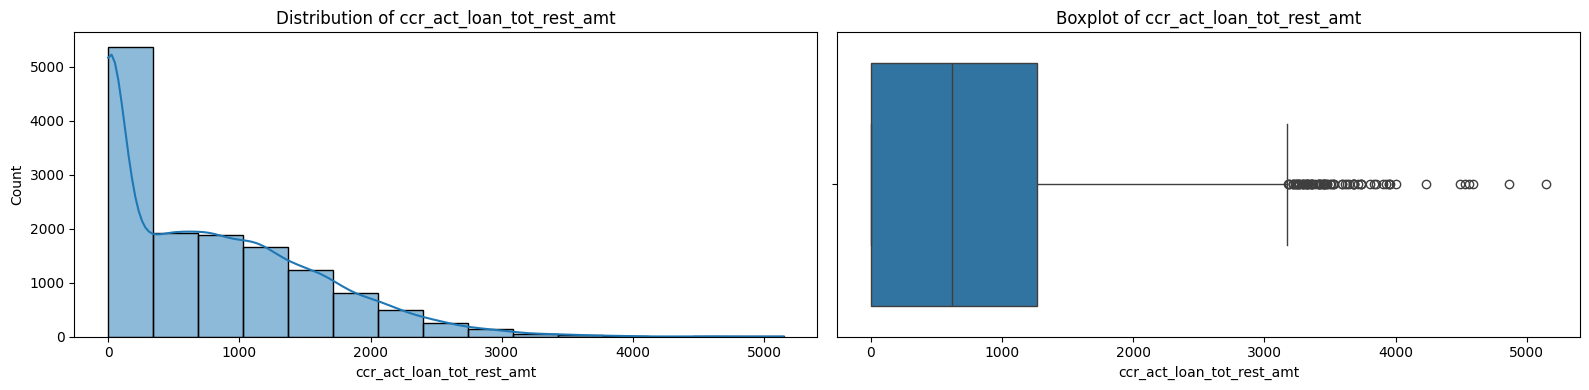

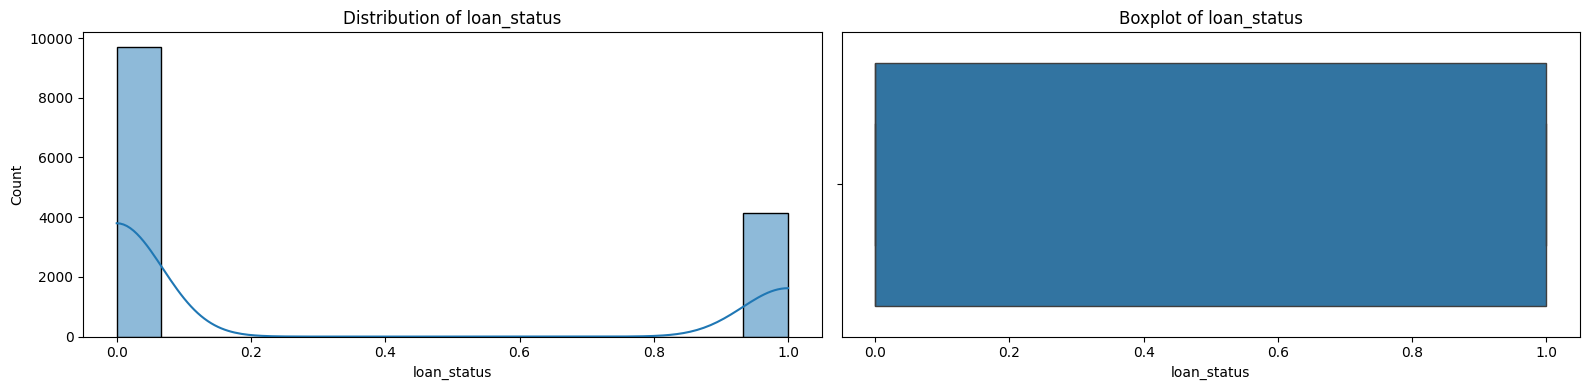

In [21]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for column in numeric_columns:
    # Set up the matplotlib figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    
    # Plot histogram using seaborn
    sns.histplot(df[column], bins=15, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    
    # Plot boxplot using seaborn
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

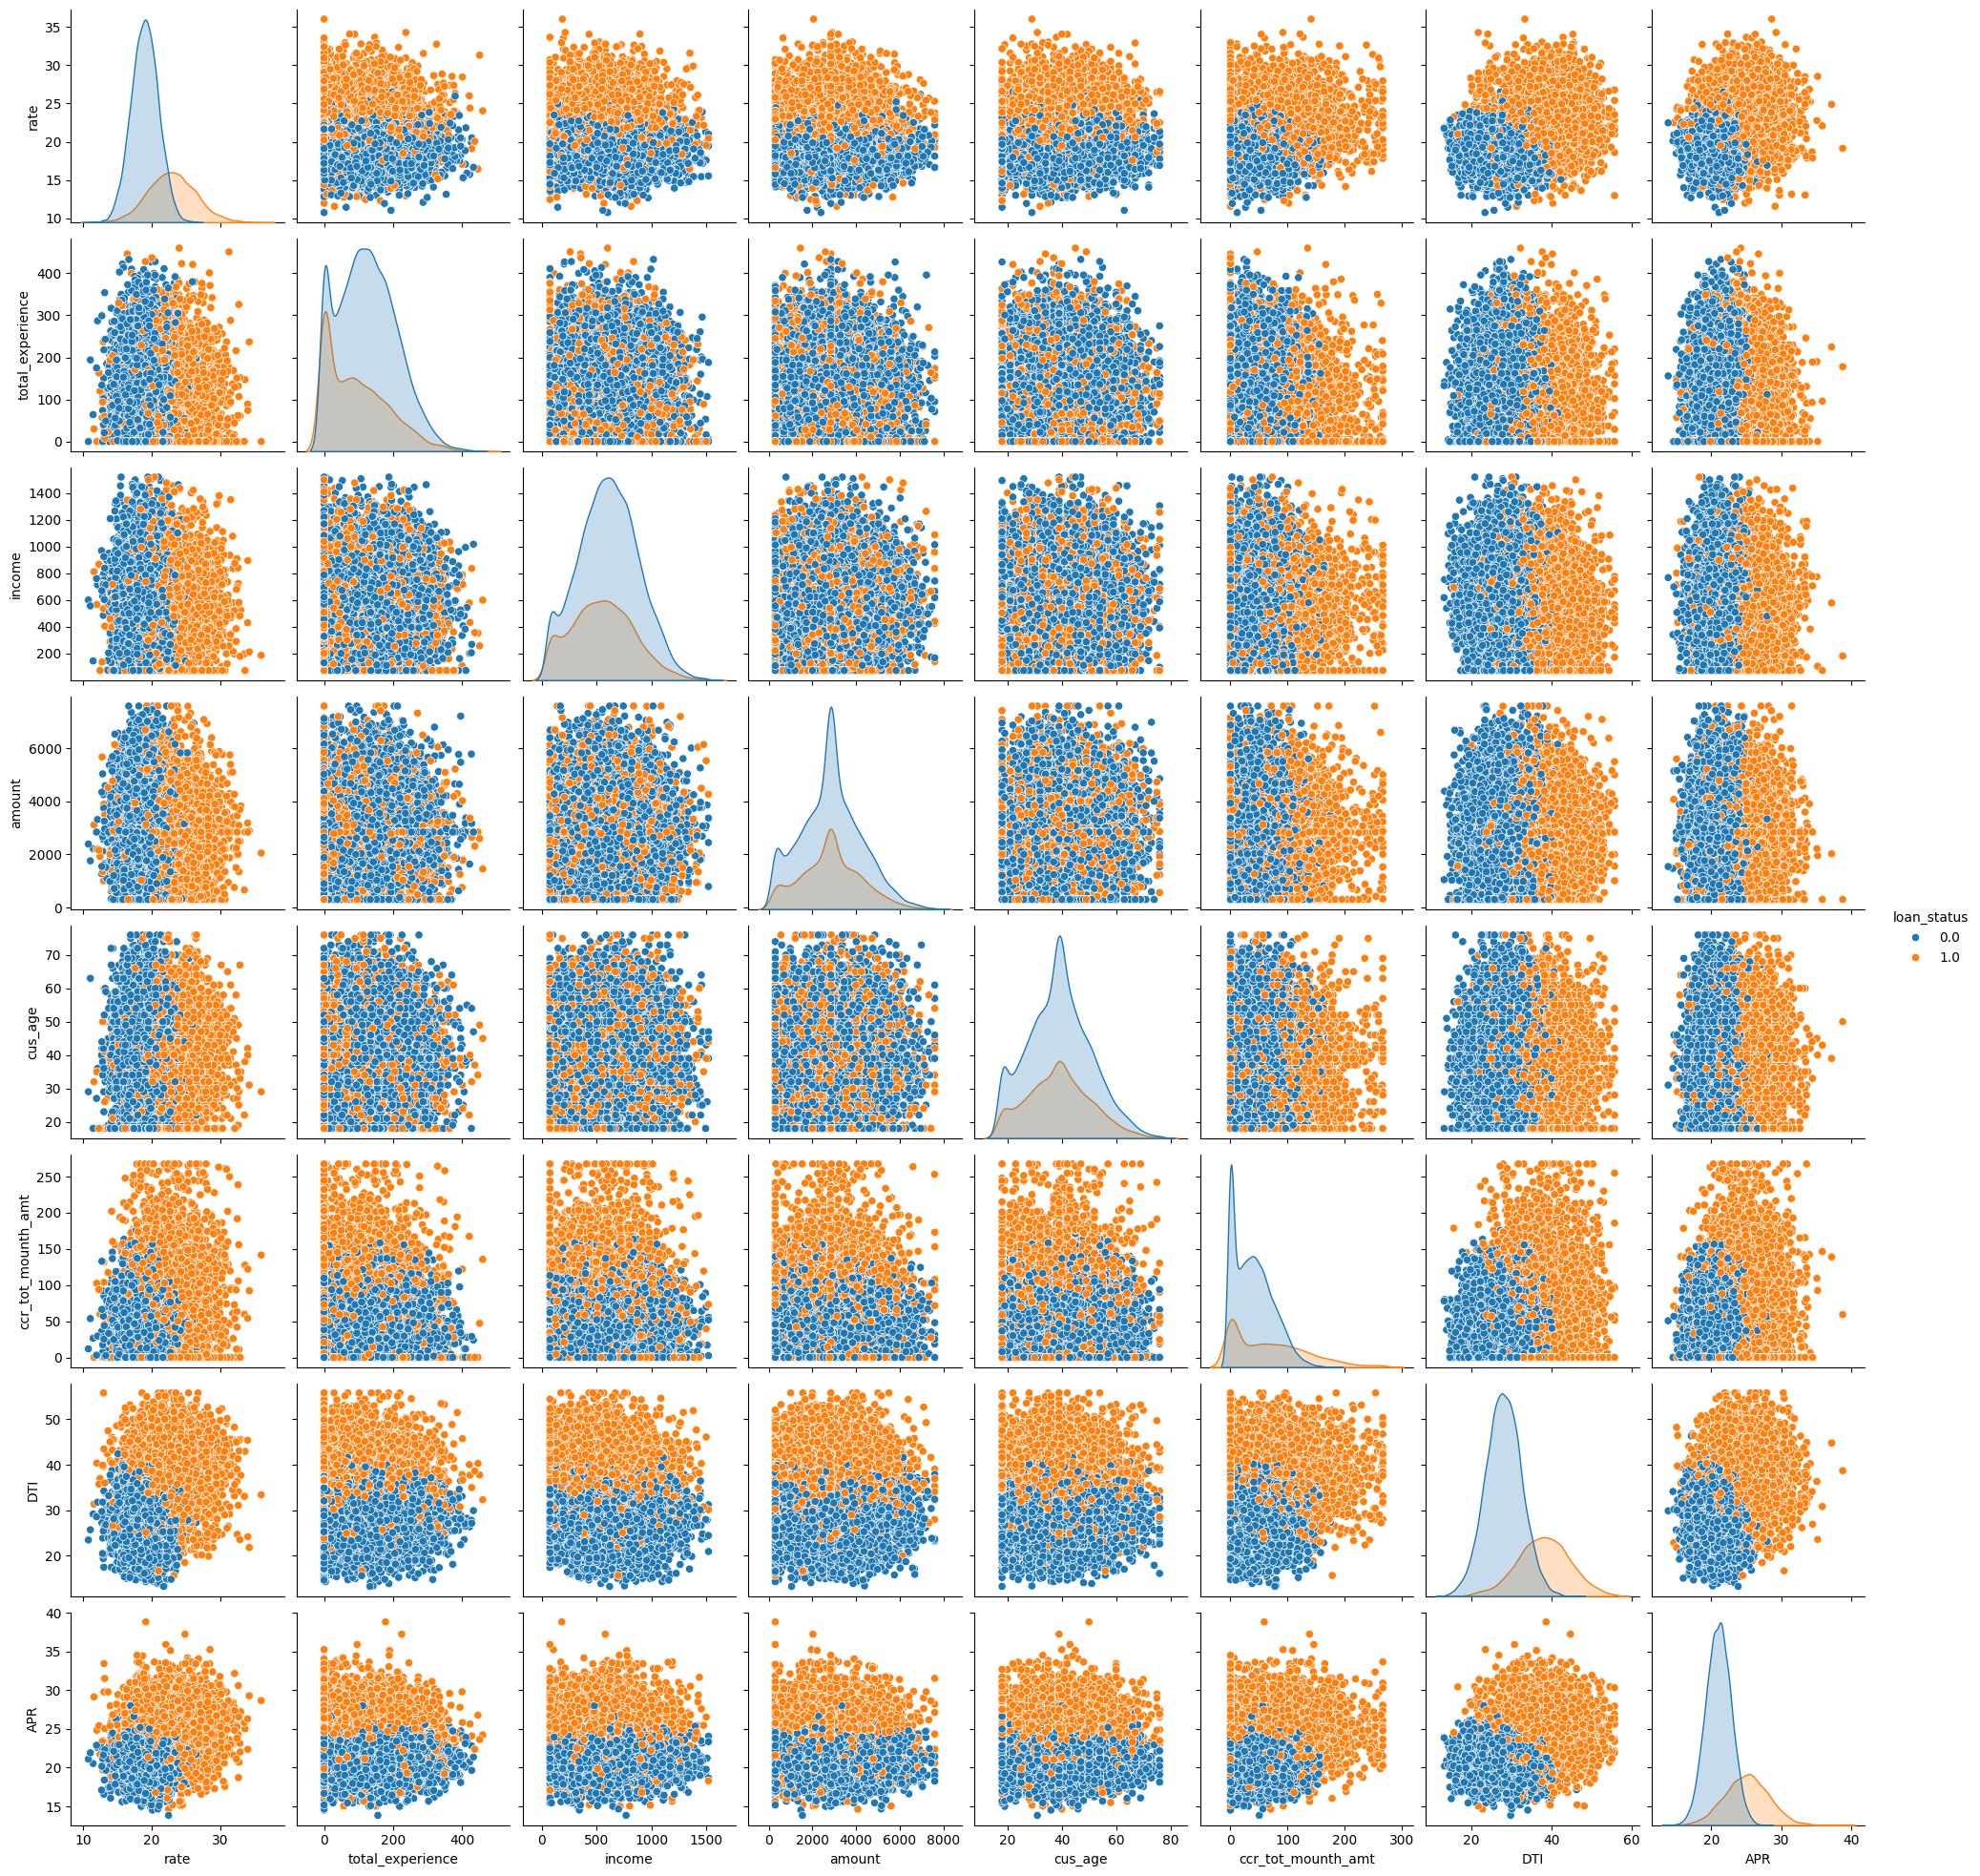

In [22]:
# Selecting a subset of variables for the pair plot
key_variables = ["rate", "total_experience", "income", "amount", "loan_status", "cus_age", "ccr_tot_mounth_amt", "DTI", "APR"]
sns.pairplot(df[key_variables], hue="loan_status");

In [23]:
df.head()

rate  amount      purpose  period  cus_age  gender education_level  \
0 20.51 4835.78     Personal   11.00    35.00  Female        Educated   
1 19.47 5043.25     Personal    8.00    43.00    Male        Educated   
2 19.83 4110.49  Maintenance   17.00    39.00  Female   Unknown/Other   
3 19.11 3977.85     Personal   31.00    33.00  Female   Unknown/Other   
4 20.00 3864.36  Maintenance   12.00    26.00    Male   Unknown/Other   

  marital_status has_children living_situation  total_experience  income  \
0         Single          Yes        Dependent            137.00 1063.26   
1         Single          Yes      Independent            184.00  165.72   
2         Single           No        Dependent              0.00   87.19   
3         Single           No        Dependent             65.00  727.13   
4        Married          Yes        Dependent            107.00 1507.51   

  job_sector   DTI   APR  ccr_tot_mounth_amt  ccr_payed_loan_tot_amt  \
0     Public 31.80 19.61               63.30                    0.00   
1     Public 41.77 30.61               46.91                12824.12   
2    Private 35.62 19.83                9.63                 5874.63   
3    Private 31.29 21.57                0.00                 6897.89   
4    Private 27.80 21.23               16.98                 2100.46   

   ccr_act_loan_tot_rest_amt  loan_status  
0                     168.93         0.00  
1                    1168.76         1.00  
2                     345.92         1.00  
3                       0.00         0.00  
4                       0.00         0.00

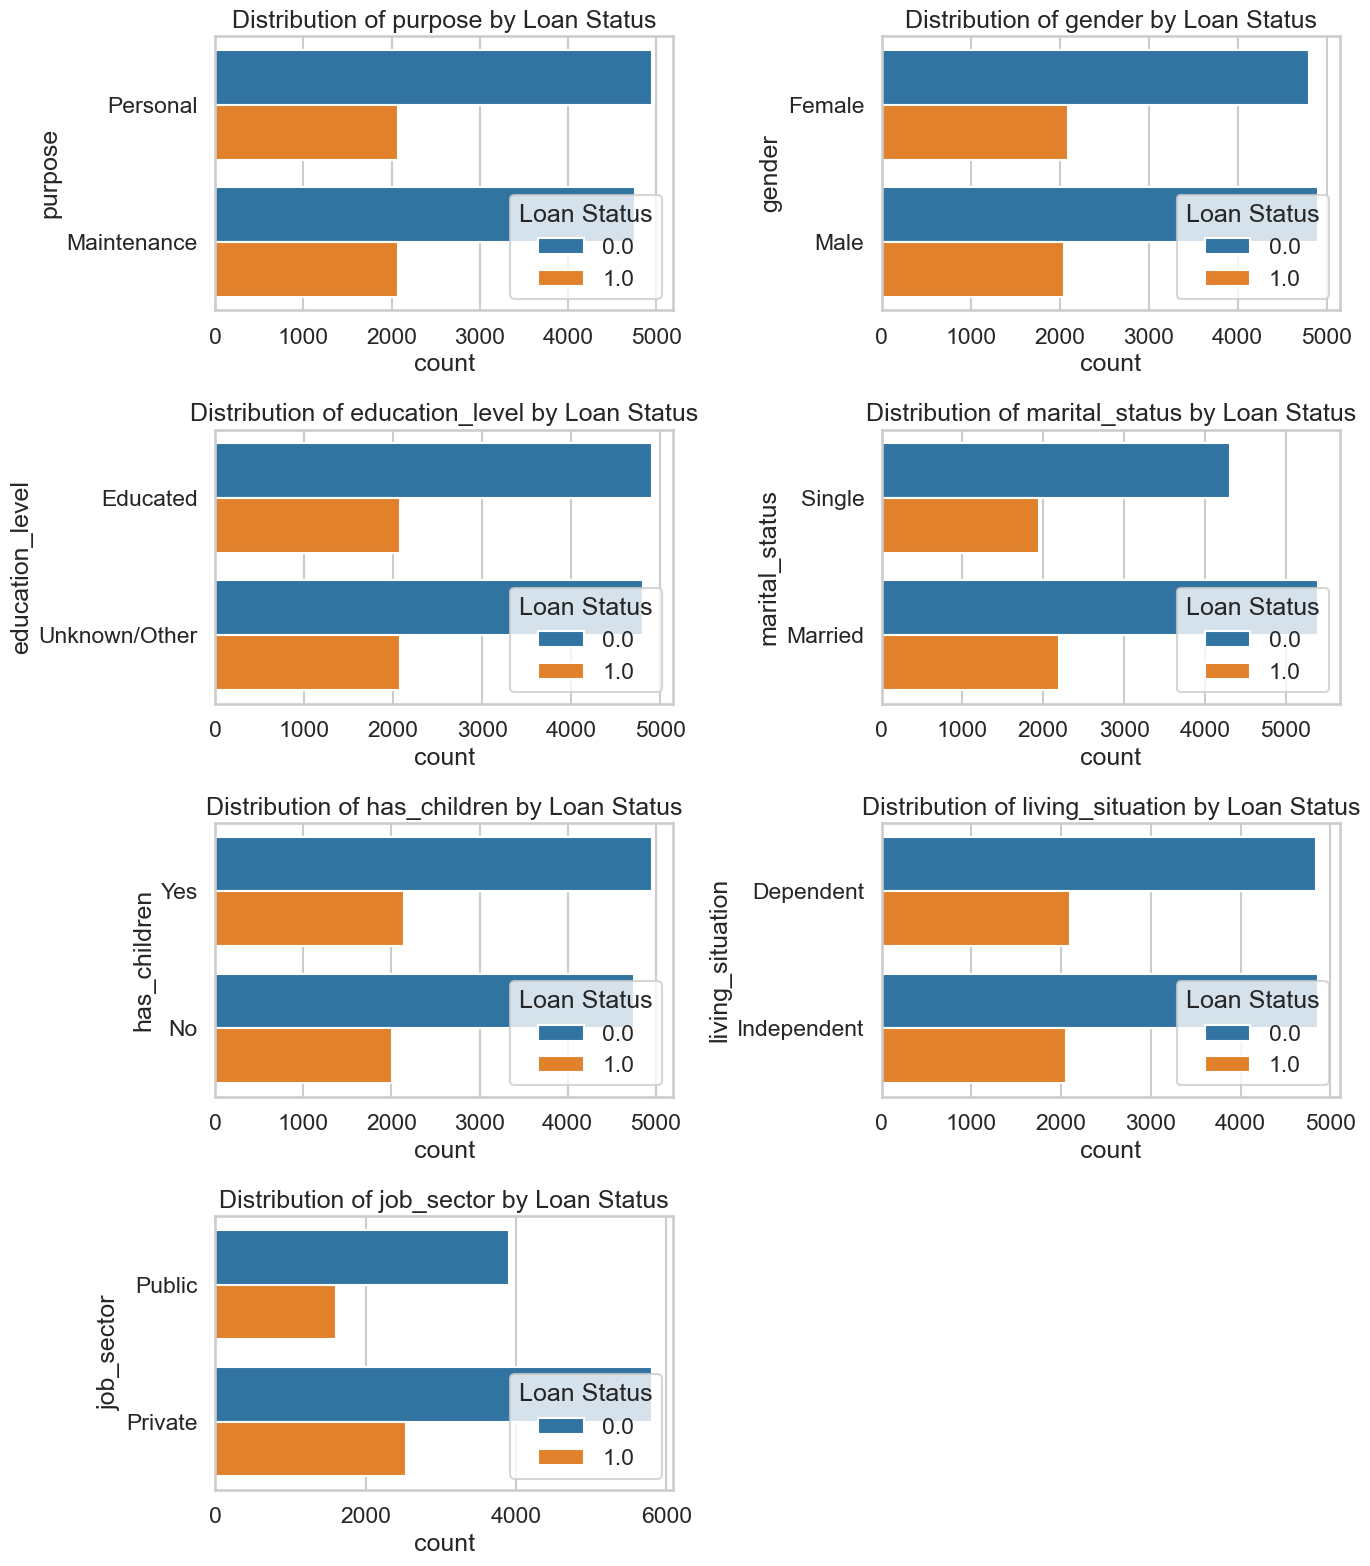

In [24]:
# Redefine our categorical columns 
categorical_columns = [
    "purpose",
    "gender",
    "education_level",
    "marital_status",
    "has_children",
    "living_situation",
    "job_sector"
]

# Set the aesthetic style and context for better readability
sns.set_style("whitegrid")
sns.set_context("talk")

# Calculate the number of rows needed based on the number of categorical columns
n_rows = (len(categorical_columns) + 1) // 2


# Initialize the subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(14, n_rows*4))  
fig.subplots_adjust(hspace=0.4, wspace=0.4)


# Iterate over the categorical columns to create a count plot for each
for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    sns.countplot(y=column, hue="loan_status", data=df, ax=ax[row][col])
    ax[row][col].set_title(f'Distribution of {column} by Loan Status')
    ax[row][col].legend(title="Loan Status", loc="lower right")


# Handle the case where there's an odd number of plots 
if len(categorical_columns) % 2 != 0:
    ax[n_rows-1, 1].axis("off")


# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show();

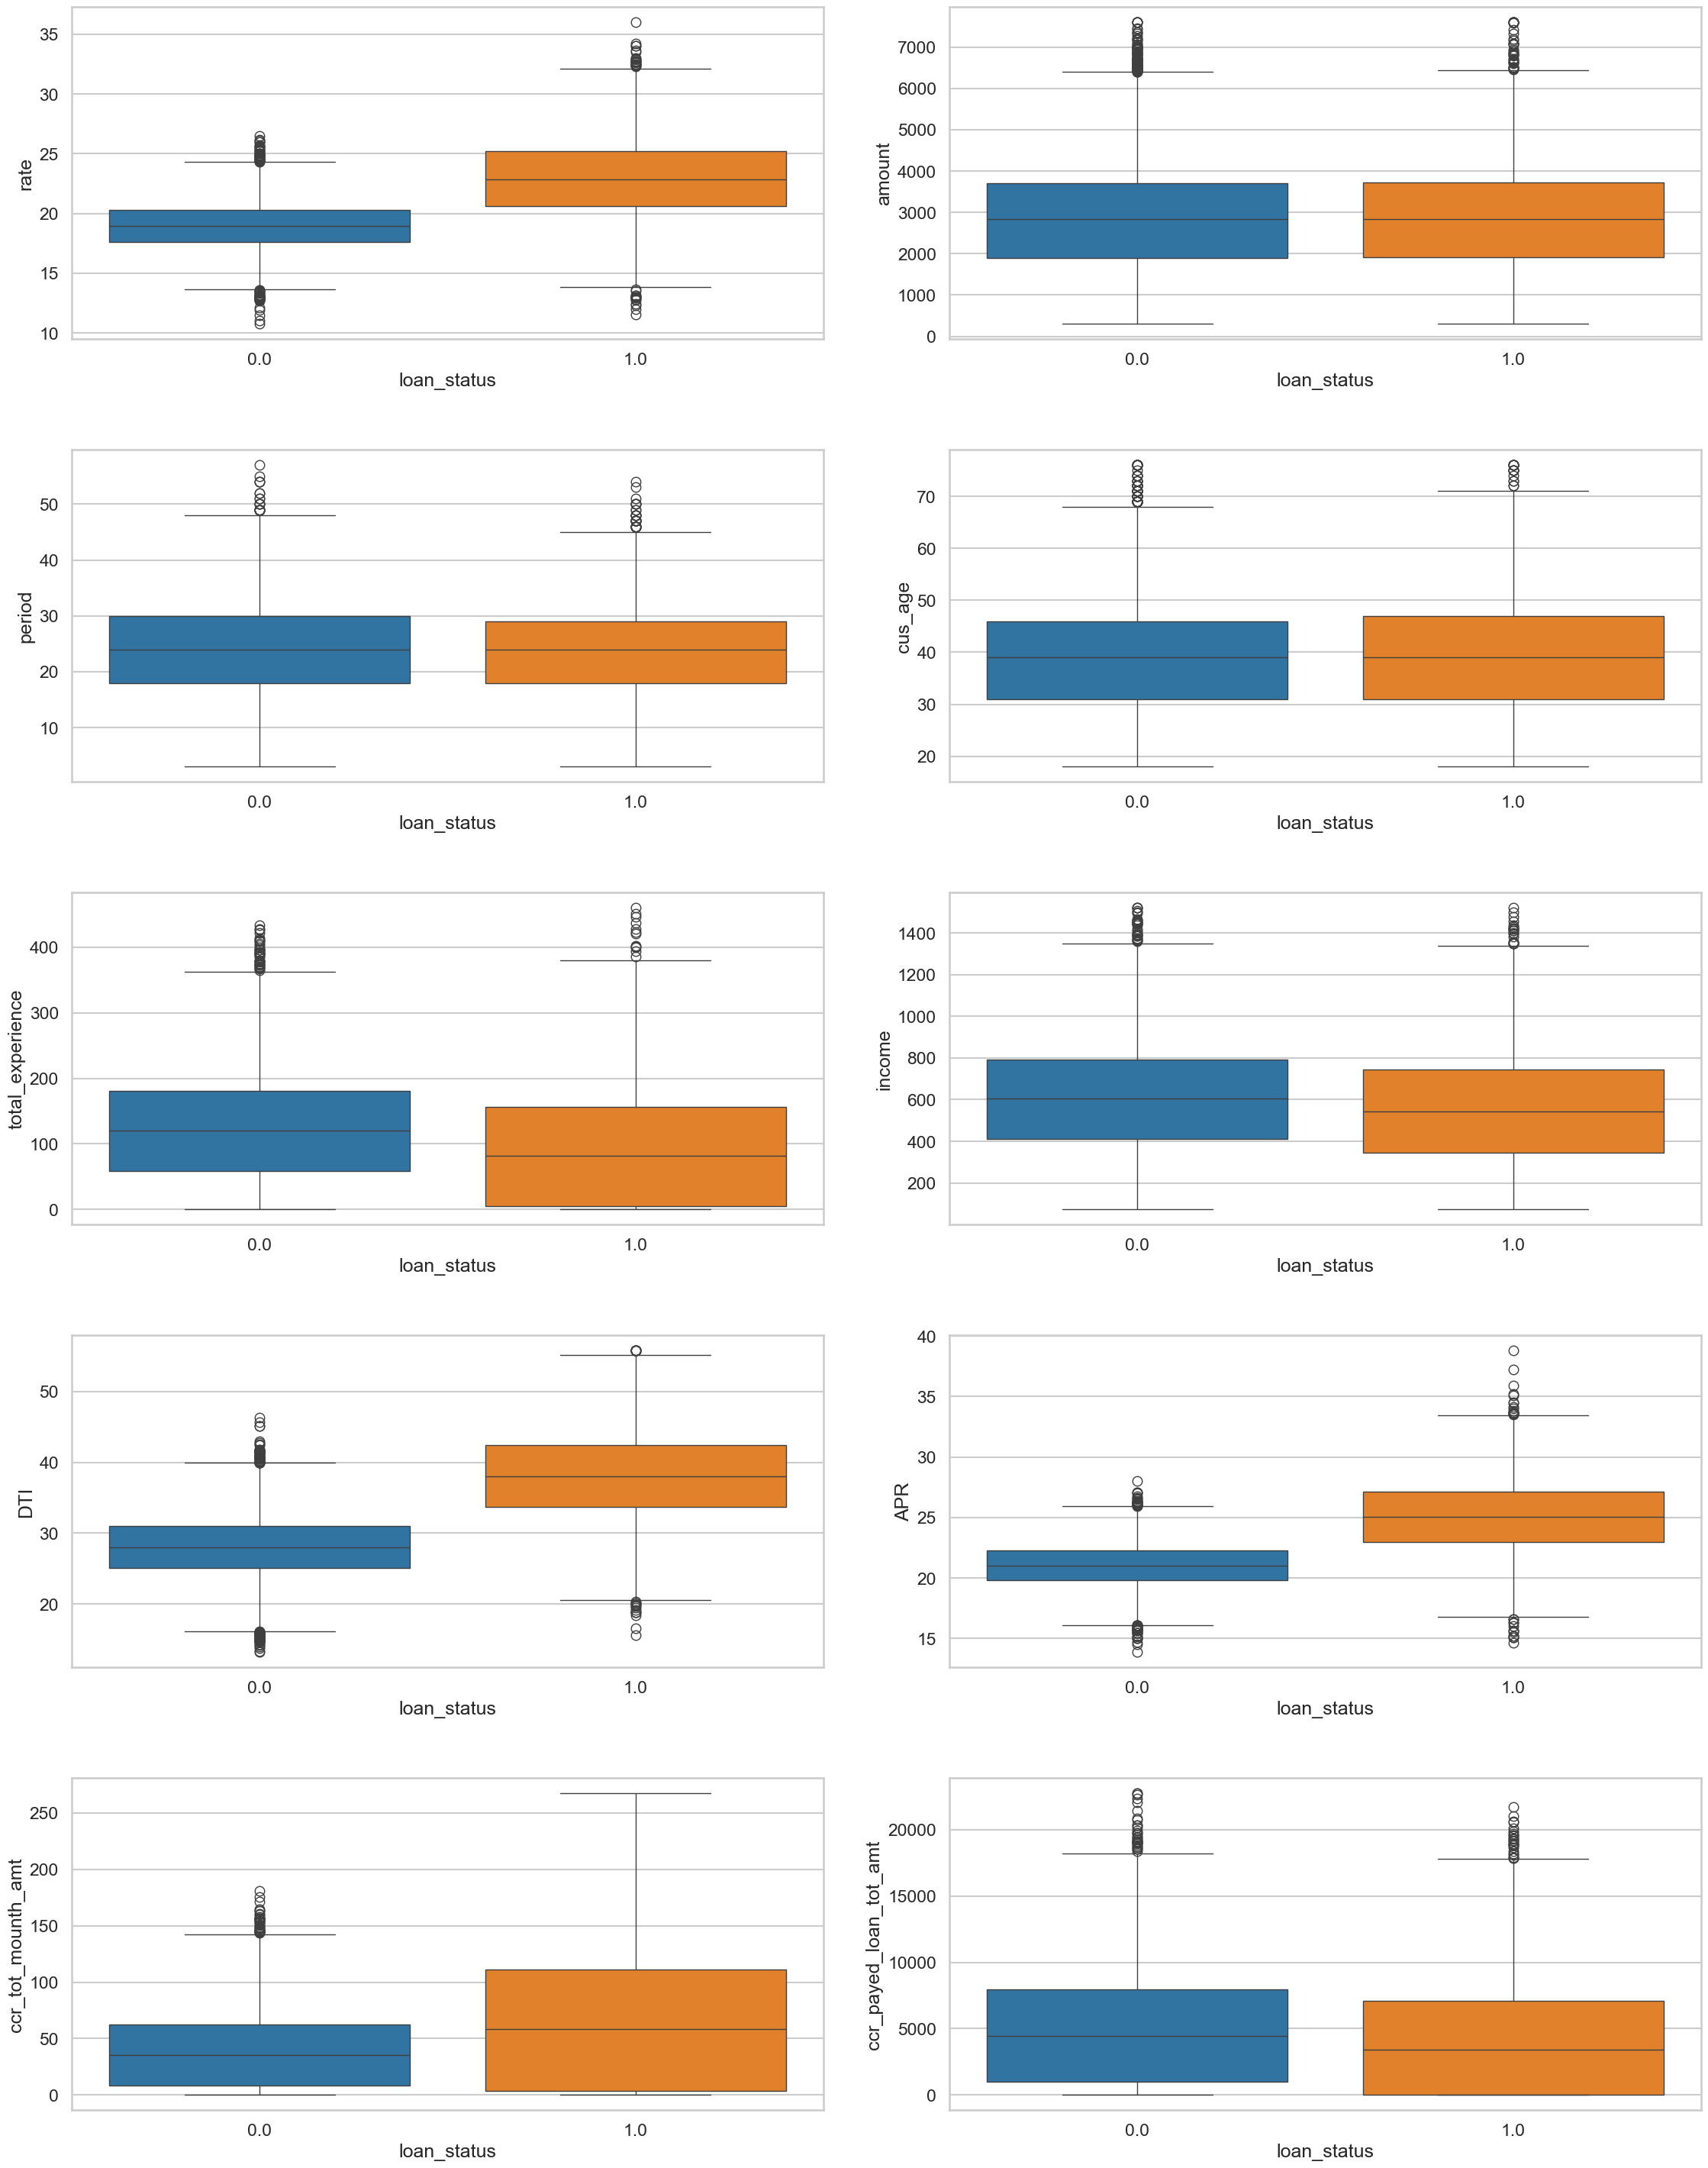

In [32]:
loan_status_colors = ["#1f77b4", "#ff7f0e"]  # First color for 0, second for 1

# Adjust the subplot grid to accommodate all features
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(24, 30))
fig.tight_layout(pad=4.0)

# Plotting each feature against loan_status using the defined colors
sns.boxplot(x="loan_status", y="rate", data=df, ax=ax[0][0], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="amount", data=df, ax=ax[0][1], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="period", data=df, ax=ax[1][0], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="cus_age", data=df, ax=ax[1][1], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="total_experience", data=df, ax=ax[2][0], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="income", data=df, ax=ax[2][1], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="DTI", data=df, ax=ax[3][0], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="APR", data=df, ax=ax[3][1], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="ccr_tot_mounth_amt", data=df, ax=ax[4][0], palette=loan_status_colors)
sns.boxplot(x="loan_status", y="ccr_payed_loan_tot_amt", data=df, ax=ax[4][1], palette=loan_status_colors)

# Show the plot
plt.show()

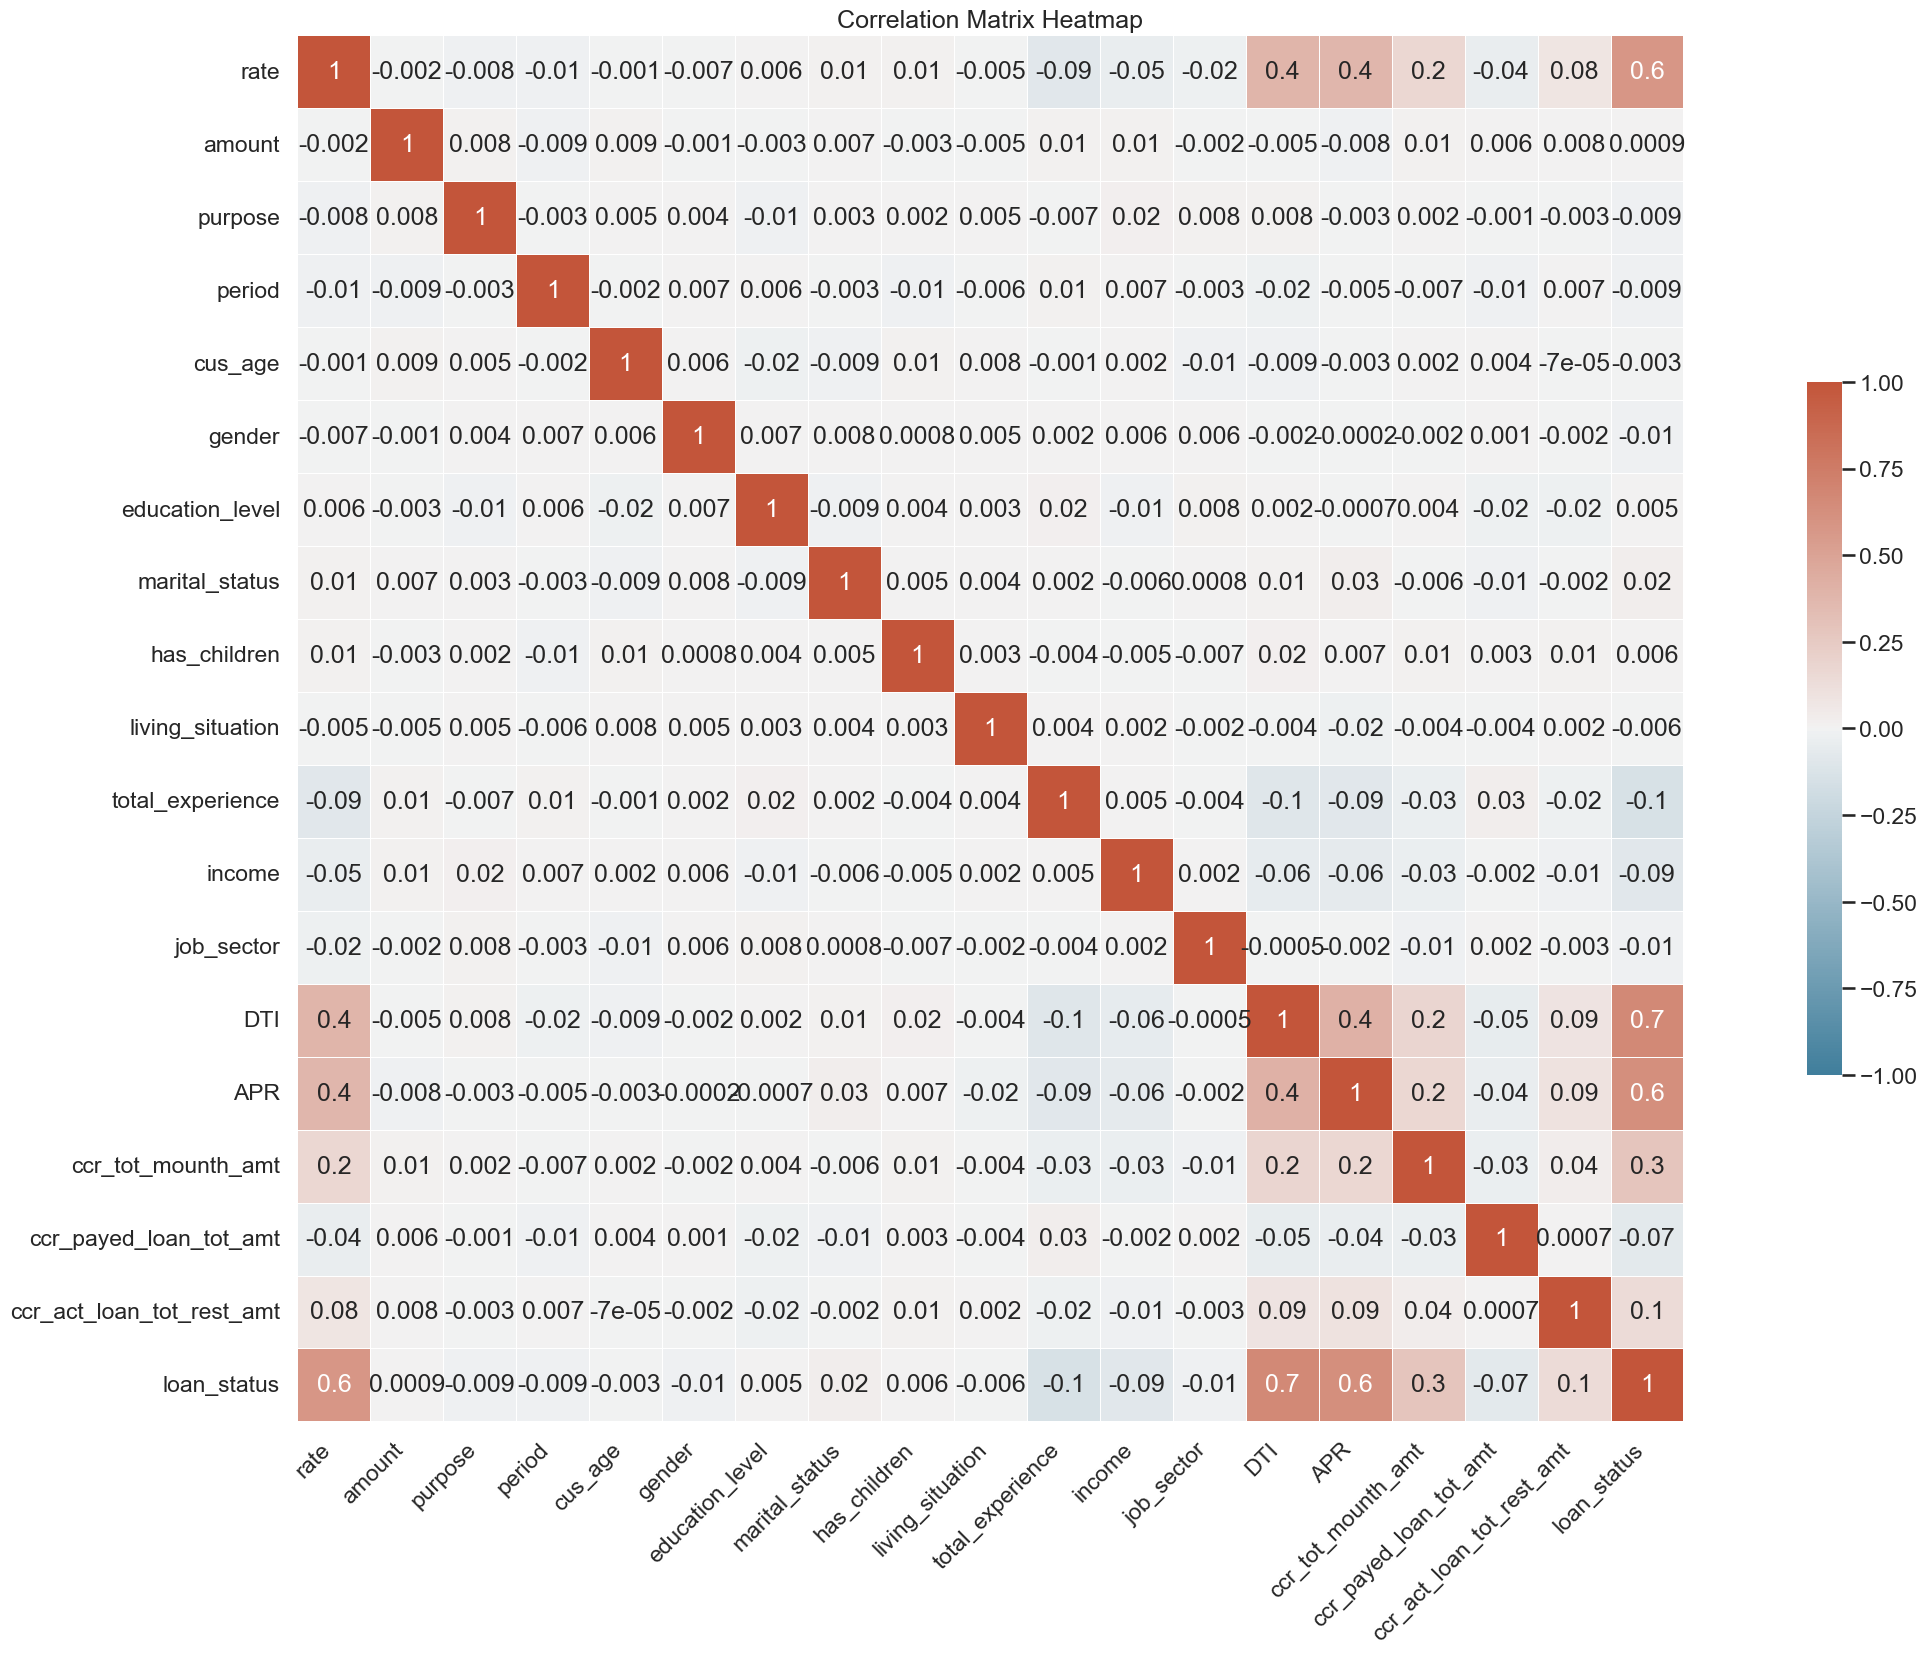

In [33]:
# Calculate the correlation matrix
corr = df_copy.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(32, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the full heatmap
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')

# Adjust the layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')

# Show the heatmap
plt.show()

In [34]:
# Split dataset into X and y
X = df_copy.drop(["loan_status"], axis=1)
y = df_copy["loan_status"]

In [35]:
# Check Mutual Information
from sklearn.feature_selection import mutual_info_classif

def compute_mi_scores(features, target):
    """
    Computes Mutual Information scores for each feature in relation to the target variable.
    
    :param features: DataFrame containing the features
    :param target: Series containing the target variable ('loan_status')
    :return: Series with MI Scores, indexed by feature names, sorted in descending order.
    """
    features_copy = features.copy()
    # Encode categorical features as integers
    for column in features_copy.select_dtypes(include=["object", "category"]):
        features_copy[column], _ = features_copy[column].factorize()

    # Identify discrete features
    is_discrete = [pd.api.types.is_integer_dtype(t) for t in features_copy.dtypes]
    
    # Compute MI scores, ensuring reproducibility with a fixed random state
    mi_scores = mutual_info_classif(features_copy, target, discrete_features=is_discrete, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=features.columns).sort_values(ascending=False)
    
    return mi_scores


def display_mi_scores(scores):
    """
    Plots the MI Scores for visual analysis.
    
    :param scores: Series containing MI scores, indexed by feature names.
    """
    scores_sorted = scores.sort_values(ascending=True)
    positions = np.arange(len(scores_sorted))
    
    plt.barh(positions, scores_sorted)
    plt.yticks(positions, scores_sorted.index)
    plt.xlabel("MI Scores")
    plt.title("Mutual Information Scores")

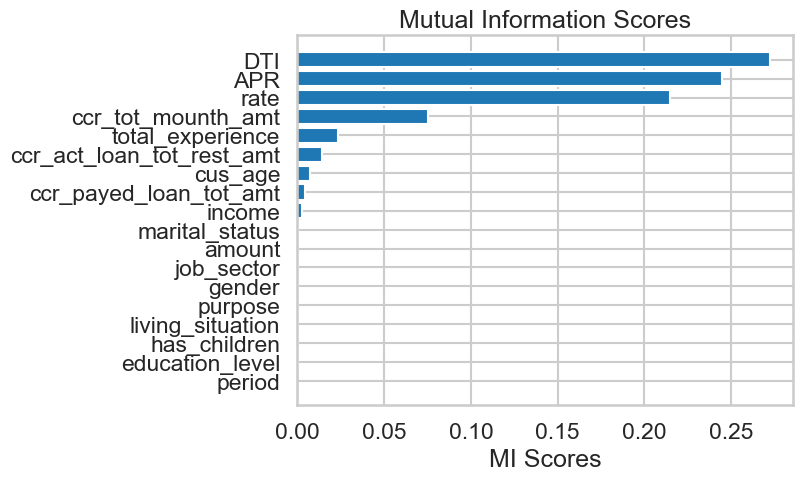

In [36]:
mi_scores = compute_mi_scores(X, y)
display_mi_scores(mi_scores)

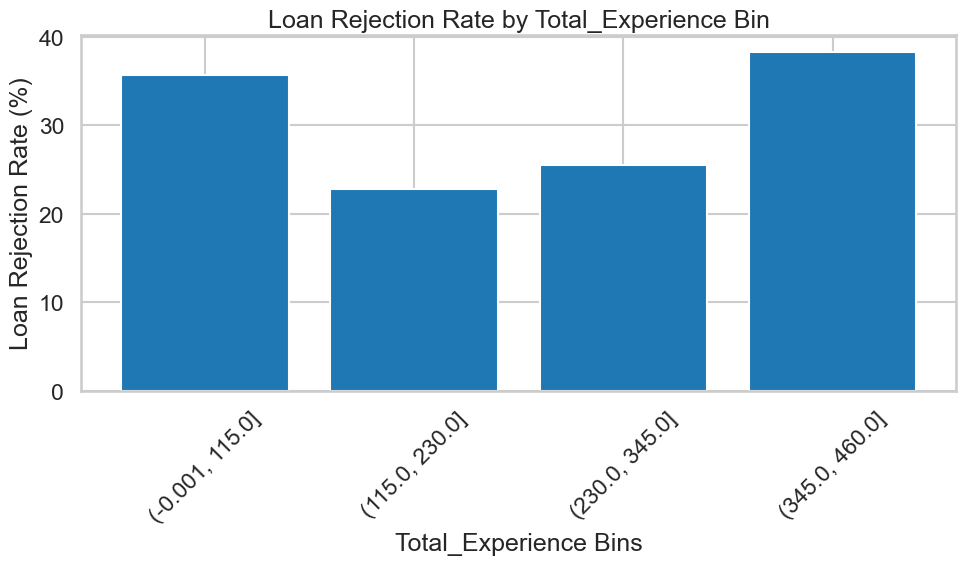

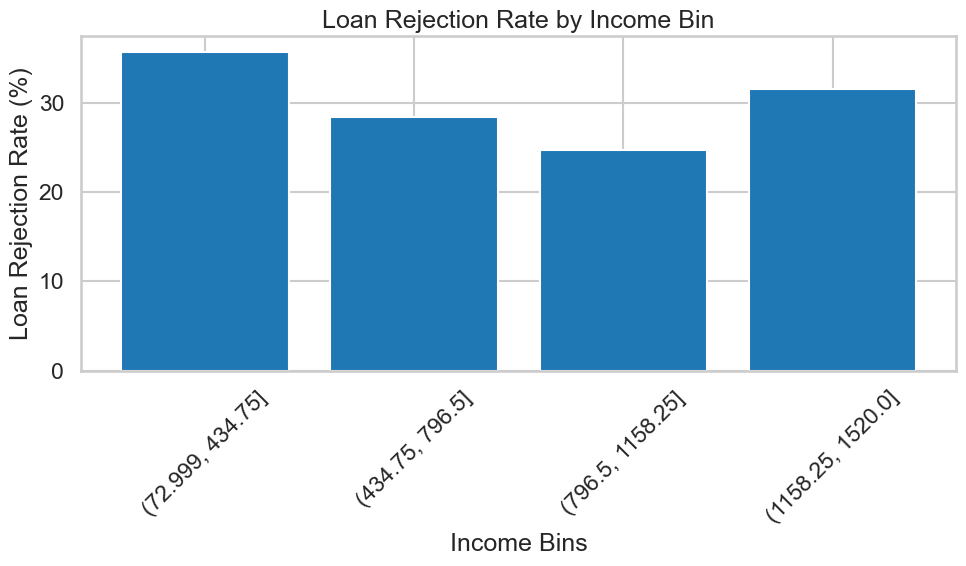

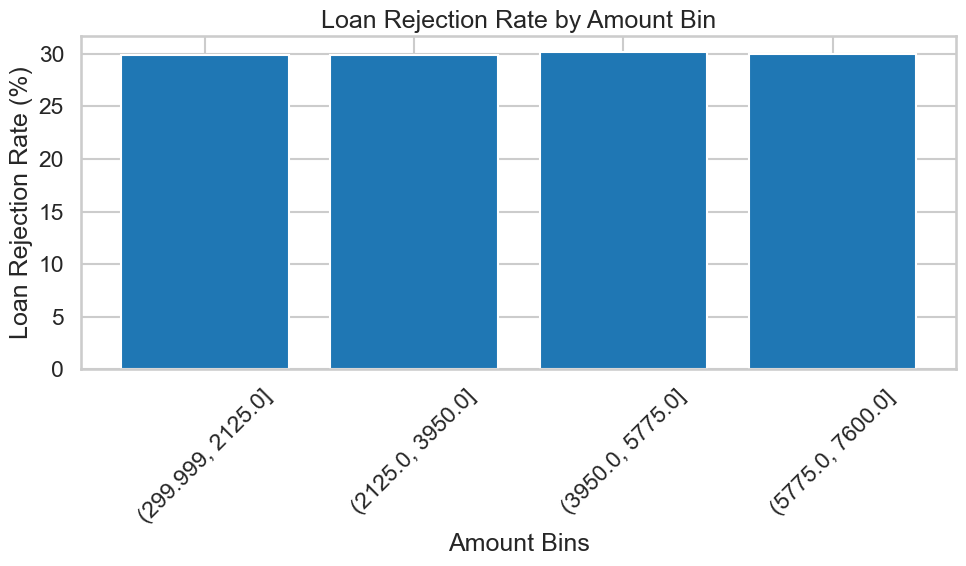

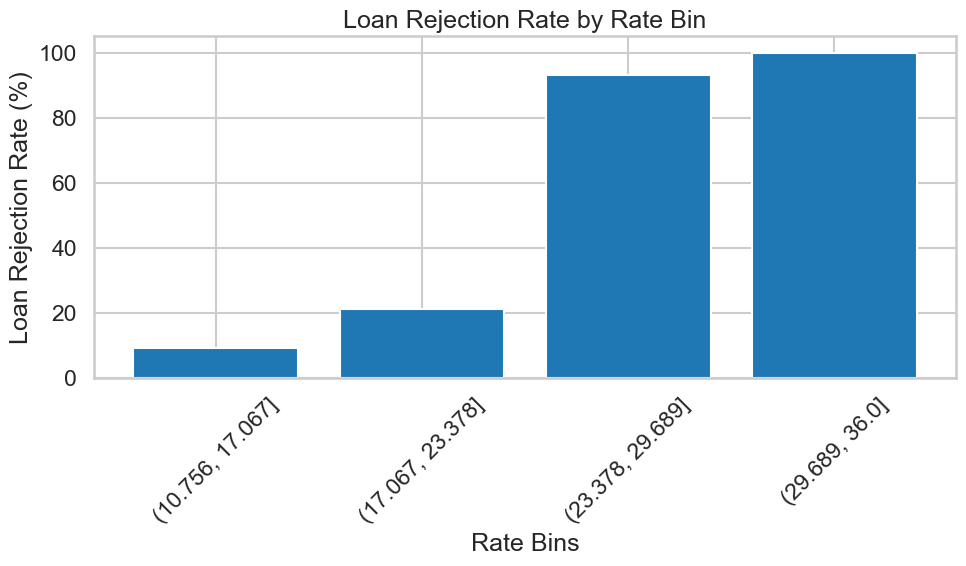

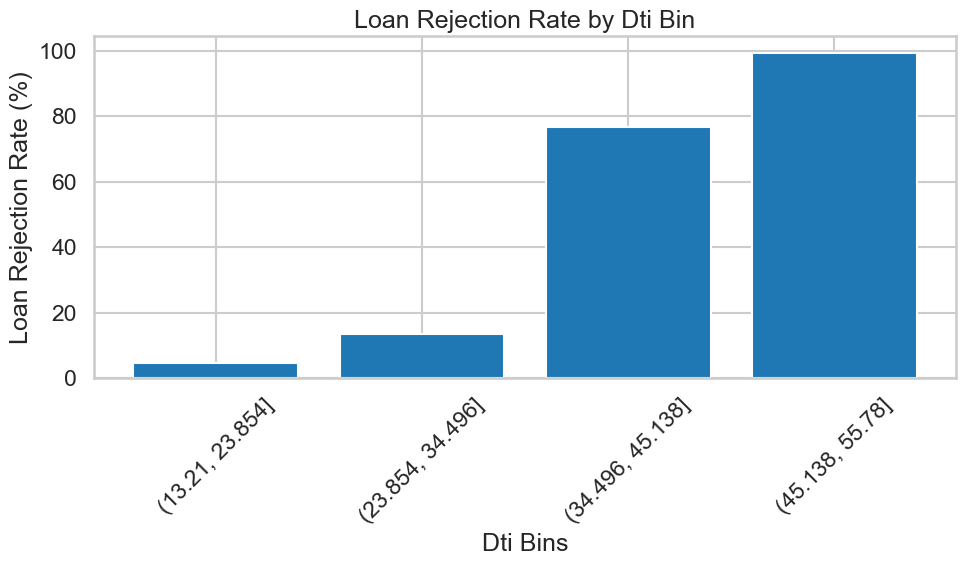

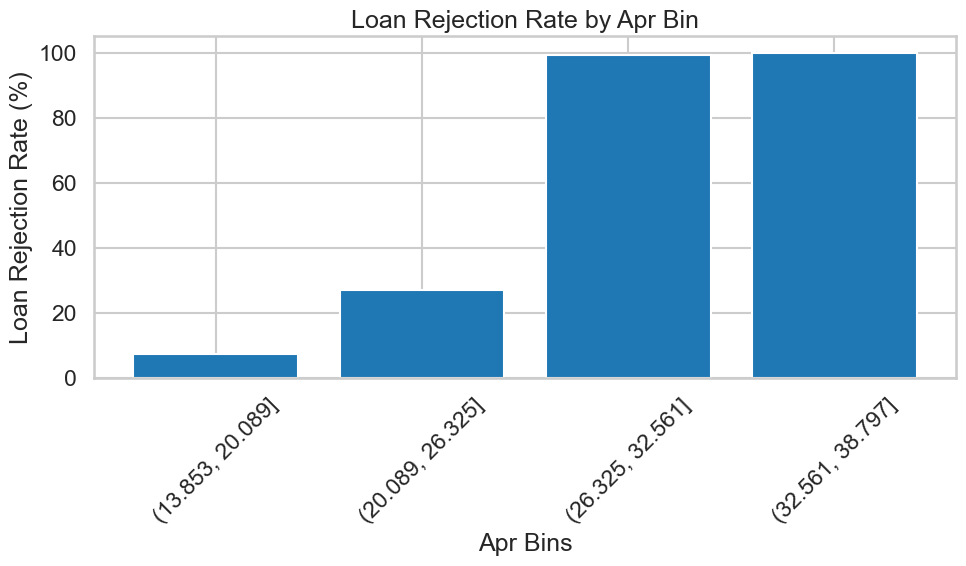

In [37]:
# Define the edges for binning each column
bin_edges = {
    "total_experience": np.linspace(df_copy["total_experience"].min(), df_copy["total_experience"].max(), num=5),
    "income": np.linspace(df_copy["income"].min(), df_copy["income"].max(), num=5),
    "amount": np.linspace(df_copy["amount"].min(), df_copy["amount"].max(), num=5),
    "rate": np.linspace(df_copy["rate"].min(), df_copy["rate"].max(), num=5),
    "DTI": np.linspace(df_copy["DTI"].min(), df_copy["DTI"].max(), num=5),
    "APR": np.linspace(df_copy["APR"].min(), df_copy["APR"].max(), num=5)
}

# Function to bin a column and calculate the loan rejection rate
def bin_and_plot(column_name, bins):
    df_copy[f"{column_name}_binned"] = pd.cut(df_copy[column_name], bins=bins, include_lowest=True)
    binned_group = df_copy.groupby(f"{column_name}_binned")["loan_status"].mean() * 100
    
    plt.figure(figsize=(10, 6))
    plt.bar(binned_group.index.astype(str), binned_group.values)
    plt.xticks(rotation=45)
    plt.xlabel(f"{column_name.title()} Bins")
    plt.ylabel("Loan Rejection Rate (%)")
    plt.title(f"Loan Rejection Rate by {column_name.title()} Bin")
    plt.tight_layout()
    plt.show()

# Loop through each column and apply the binning and plotting function
for column, bins in bin_edges.items():
    bin_and_plot(column, bins)